In [6]:
# coding:gb18030
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
# 读取文件
df = pd.read_csv('data.csv', encoding='gb18030')
df.head()

,Unnamed: 0,custid,trade_no,bank_card_no,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,...,loans_max_limit,loans_avg_limit,consfin_credit_limit,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day
0,5,2791858,20180507115231274000000023057383,卡号1,0.01,0.99,0,0.90,0.55,0.313,...,2900.0,1688.0,1200.0,75.0,1.0,2.0,1200.0,1200.0,12.0,18.0
1,10,534047,20180507121002192000000023073000,卡号1,0.02,0.94,2000,1.28,1.00,0.458,...,3500.0,1758.0,15100.0,80.0,5.0,6.0,22800.0,9360.0,4.0,2.0
2,12,2849787,20180507125159718000000023114911,卡号1,0.04,0.96,0,1.00,1.00,0.114,...,1600.0,1250.0,4200.0,87.0,1.0,1.0,4200.0,4200.0,2.0,6.0
3,13,1809708,20180507121358683000000388283484,卡号1,0.00,0.96,2000,0.13,0.57,0.777,...,3200.0,1541.0,16300.0,80.0,5.0,5.0,30000.0,12180.0,2.0,4.0
4,14,2499829,20180507115448545000000388205844,卡号1,0.01,0.99,0,0.46,1.00,0.175,...,2300.0,1630.0,8300.0,79.0,2.0,2.0,8400.0,8250.0,22.0,120.0


In [8]:
# 先判断数据的类型(包括有多少int float类型 有多少object类型)
# 重点也关注的是object类型
#def overall(data):
    #typedict = {}
    #for name in data.columns:
        #typedict[str(data[name].dtype)]
# python get方法
# https://www.baidu.com/s?wd=python%20get&rsv_spt=1&rsv_iqid=0xf37129d30035b5d7&issp=1&f=8&rsv_bp=1&rsv_idx=2&ie=utf-8&rqlang=cn&tn=baiduhome_pg&rsv_enter=1&rsv_dl=tb&oq=%25E5%2596%259C%25E9%25A9%25AC%25E6%258B%2589%25E9%259B%2585FM&inputT=1187&rsv_t=c6a2ImDkAFRSaIjBEOSA%2F9VoRg%2Bztsd2AyJEMkAYF%2FUteTcQM3ecTxzu%2FIZkp1sxjI6f&rsv_sug3=28&rsv_pq=b15b5a2a0039900c&rsv_sug2=0&rsv_sug4=1920&rsv_jmp=slow
def overall(data):
    typedict = {}
    for name in data.columns:
        typedict[str(data[name].dtype)] = typedict.get(str(data[name].dtype), []) + [name]
    for key, value in typedict.items():
        print ('we have {} columns in type {}, they are {}\n'.format(len(value), key, value))
        #print (str(data[name].dtype))
overall(df)

we have 13 columns in type int64, they are ['Unnamed: 0', 'custid', 'take_amount_in_later_12_month_highest', 'repayment_capability', 'is_high_user', 'historical_trans_amount', 'trans_amount_3_month', 'abs', 'avg_price_last_12_month', 'max_cumulative_consume_later_1_month', 'pawns_auctions_trusts_consume_last_1_month', 'pawns_auctions_trusts_consume_last_6_month', 'status']

we have 7 columns in type object, they are ['trade_no', 'bank_card_no', 'reg_preference_for_trad', 'source', 'id_name', 'latest_query_time', 'loans_latest_time']

we have 70 columns in type float64, they are ['low_volume_percent', 'middle_volume_percent', 'trans_amount_increase_rate_lately', 'trans_activity_month', 'trans_activity_day', 'transd_mcc', 'trans_days_interval_filter', 'trans_days_interval', 'regional_mobility', 'student_feature', 'number_of_trans_from_2011', 'first_transaction_time', 'historical_trans_day', 'rank_trad_1_month', 'avg_consume_less_12_valid_month', 'top_trans_count_last_1_month', 'avg_price

In [9]:
# 无关特征删除
# 删除规则包括了 1.在这组特征值上取值相同 2.部分无意义的数据(需要专家经验)
len(df.columns)

90

In [10]:
def same_value_delete(data):
    for name in data.columns:
        if len(data[name].value_counts()) == 1:
            data.drop(name, axis=1, inplace=True)
same_value_delete(df)      

In [11]:
len(df.columns)

88

In [12]:
# 分析其他数据
df['trade_no'].head()

0    20180507115231274000000023057383
1    20180507121002192000000023073000
2    20180507125159718000000023114911
3    20180507121358683000000388283484
4    20180507115448545000000388205844
Name: trade_no, dtype: object

In [13]:
# 根据专家经验删除无意义的特征
df.drop(['trade_no', 'custid', 'id_name'], inplace=True, axis=1)

In [14]:
len(df.columns)

85

In [15]:
# 数值类型的转换
overall(df)

we have 12 columns in type int64, they are ['Unnamed: 0', 'take_amount_in_later_12_month_highest', 'repayment_capability', 'is_high_user', 'historical_trans_amount', 'trans_amount_3_month', 'abs', 'avg_price_last_12_month', 'max_cumulative_consume_later_1_month', 'pawns_auctions_trusts_consume_last_1_month', 'pawns_auctions_trusts_consume_last_6_month', 'status']

we have 70 columns in type float64, they are ['low_volume_percent', 'middle_volume_percent', 'trans_amount_increase_rate_lately', 'trans_activity_month', 'trans_activity_day', 'transd_mcc', 'trans_days_interval_filter', 'trans_days_interval', 'regional_mobility', 'student_feature', 'number_of_trans_from_2011', 'first_transaction_time', 'historical_trans_day', 'rank_trad_1_month', 'avg_consume_less_12_valid_month', 'top_trans_count_last_1_month', 'avg_price_top_last_12_valid_month', 'trans_top_time_last_1_month', 'trans_top_time_last_6_month', 'consume_top_time_last_1_month', 'consume_top_time_last_6_month', 'cross_consume_cou

In [16]:
# 城市类型(加上dropna=False 是把NaN也计算在内)
df['reg_preference_for_trad'].value_counts(dropna=False)

一线城市    3403
三线城市    1064
境外       150
二线城市     131
其他城市       4
NaN        2
Name: reg_preference_for_trad, dtype: int64

In [17]:
df['reg_preference_for_trad'].fillna('其他城市', inplace=True)

In [18]:
# 城市改变成编码
df['reg_preference_for_trad'].replace(
{
    '一线城市':1, 
    '二线城市':2,
    '三线城市':3,
    '境外':4,
    '其他城市':5
}, inplace=True)

In [19]:
df['reg_preference_for_trad'].value_counts(dropna=False)

1    3403
3    1064
4     150
2     131
5       6
Name: reg_preference_for_trad, dtype: int64

In [20]:
# 处理缺失值
# 首先查看缺失值
df.isnull().sum()

Unnamed: 0                                  0
low_volume_percent                          2
middle_volume_percent                       2
take_amount_in_later_12_month_highest       0
trans_amount_increase_rate_lately           3
trans_activity_month                        2
trans_activity_day                          2
transd_mcc                                  2
trans_days_interval_filter                  8
trans_days_interval                         2
regional_mobility                           2
student_feature                          2998
repayment_capability                        0
is_high_user                                0
number_of_trans_from_2011                   2
first_transaction_time                      2
historical_trans_amount                     0
historical_trans_day                        2
rank_trad_1_month                           2
trans_amount_3_month                        0
avg_consume_less_12_valid_month             2
abs                               

ValueError: could not convert string to float: 'Unnamed: 0'

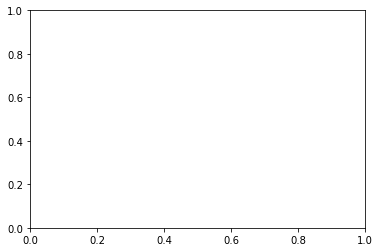

In [21]:
# 画图查看数据缺失情况
import matplotlib.pyplot as plt
plt.plot(df.isnull().sum())

In [22]:
# 学生类型处缺失值较多 将空值填充为0型学生
df['student_feature'].fillna(0, inplace=True)

In [23]:
# 对每行进行处理 如果该行空值数超过80 则删除
df.dropna(thresh=80, axis=0, inplace=True)

In [24]:
df.fillna(df.mean(), inplace=True)

,Unnamed: 0,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,transd_mcc,trans_days_interval_filter,trans_days_interval,...,loans_max_limit,loans_avg_limit,consfin_credit_limit,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day
0,5,0.01,0.99,0,0.90,0.55,0.313,17.0,27.0,26.0,...,2900.0,1688.0,1200.0,75.0,1.0,2.0,1200.0,1200.0,12.0,18.0
1,10,0.02,0.94,2000,1.28,1.00,0.458,19.0,30.0,14.0,...,3500.0,1758.0,15100.0,80.0,5.0,6.0,22800.0,9360.0,4.0,2.0
2,12,0.04,0.96,0,1.00,1.00,0.114,13.0,68.0,22.0,...,1600.0,1250.0,4200.0,87.0,1.0,1.0,4200.0,4200.0,2.0,6.0
3,13,0.00,0.96,2000,0.13,0.57,0.777,22.0,14.0,6.0,...,3200.0,1541.0,16300.0,80.0,5.0,5.0,30000.0,12180.0,2.0,4.0
4,14,0.01,0.99,0,0.46,1.00,0.175,13.0,66.0,42.0,...,2300.0,1630.0,8300.0,79.0,2.0,2.0,8400.0,8250.0,22.0,120.0
5,15,0.02,0.98,2000,7.59,1.00,0.733,27.0,8.0,11.0,...,5300.0,1941.0,11200.0,80.0,10.0,12.0,20400.0,8130.0,3.0,4.0
6,16,0.02,0.98,0,23.67,0.94,0.087,10.0,54.0,53.0,...,2200.0,2200.0,7600.0,73.0,2.0,2.0,16800.0,8900.0,1.0,3.0
8,20,0.03,0.65,0,0.31,0.76,0.472,15.0,21.0,14.0,...,5300.0,4750.0,5500.0,79.0,8.0,11.0,19200.0,7987.0,24.0,7.0
9,26,0.01,0.99,500,0.80,1.00,0.088,15.0,36.0,35.0,...,2800.0,1520.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,142.0
10,28,0.01,0.99,0,2.48,0.94,0.322,16.0,29.0,21.0,...,1800.0,1325.0,9900.0,80.0,7.0,8.0,20400.0,7757.0,12.0,9.0


In [25]:
df.describe()

,Unnamed: 0,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,transd_mcc,trans_days_interval_filter,trans_days_interval,...,loans_max_limit,loans_avg_limit,consfin_credit_limit,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day
count,4422.000000,4422.000000,4422.000000,4422.000000,4422.000000,4422.000000,4422.000000,4422.000000,4422.000000,4422.000000,...,4422.000000,4422.000000,4422.000000,4422.000000,4422.000000,4422.000000,4422.000000,4422.000000,4422.000000,4422.000000
mean,5990.563772,0.021493,0.902510,1975.203528,14.965855,0.804733,0.369077,17.621891,28.866802,21.542062,...,3399.298960,1823.483039,9194.821348,76.138173,4.755767,5.253731,16194.482135,8016.497512,23.913388,54.875622
std,3456.082641,0.038204,0.140694,4006.226955,719.529333,0.196672,0.169947,4.440865,22.633197,16.241934,...,1467.777081,579.527631,7301.117578,14.319397,2.970191,3.404606,14248.409042,5662.652516,37.518129,53.341698
min,5.000000,0.000000,0.000000,0.000000,0.000000,0.120000,0.033000,3.000000,0.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.000000,-2.000000
25%,3066.500000,0.010000,0.880000,0.000000,0.610000,0.670000,0.236000,15.000000,16.000000,12.000000,...,2300.000000,1540.000000,4800.000000,77.000000,2.000000,3.000000,7800.000000,4750.000000,5.000000,10.000000
50%,5984.000000,0.010000,0.960000,600.000000,0.960000,0.860000,0.354000,18.000000,23.000000,17.000000,...,3200.000000,1811.000000,7700.000000,79.000000,4.000000,5.000000,13800.000000,7050.000000,14.000000,36.000000
75%,8985.500000,0.020000,0.990000,2000.000000,1.580000,1.000000,0.480000,20.000000,32.000000,26.000000,...,4300.000000,2100.000000,11700.000000,80.000000,7.000000,7.000000,20400.000000,10000.000000,24.000000,90.000000
max,11992.000000,1.000000,1.000000,68000.000000,47596.740000,1.000000,0.941000,42.000000,285.000000,234.000000,...,10000.000000,6900.000000,87100.000000,87.000000,18.000000,20.000000,266400.000000,82800.000000,360.000000,323.000000


In [49]:
# 对数据集进行切分
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(df, test_size=0.3, random_state=2018)
train_data.to_csv('train_data.csv')
test_data.to_csv('test_data.csv')

In [33]:
df.to_csv('task1.csv', index=None, encoding='gb18030')

In [27]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [34]:
df1 = pd.read_csv('task1.csv', encoding='gb18030')

In [51]:
y = df1['status']
X = df1.drop('status', axis=1)

In [37]:
# 计算iv值
import numpy as np
import math
import pandas as pd
from sklearn.utils.multiclass import type_of_target
from scipy import stats

# 计算woe值与iv值
def woe(X, y, event):
    res_woe = []
    res_iv = []
    X1 = feature_discretion(X)
    for i in range(0, X1.shape[-1]):
        x = X1[:, i]
        woe_dict, iv1 = woe_single_x(x, y, event)
        res_woe.append(woe_dict)
        res_iv.append(iv1)
    return np.array(res_woe), np.array(res_iv)

# 求单个特征的woe值
def woe_single_x(x, y, event):
    event_total, non_event_total = count_binary(y, event)
    x_labels = np.unique(x)
    woe_dict = {}
    iv = 0
    for x1 in x_labels:
        y1 = y[np.where(x == x1)[0]]
        event_count, non_event_count = count_binary(y1, event=event)
        rate_event = 1.0 * event_count/event_total
        rate_non_event = 1.0 * non_event_count / non_event_total
        if rate_event == 0:
            print ()
        elif rate_non_event == 0:
            print ()
        else:
            woe1 = math.log(rate_event/rate_non_event)
            woe_dict[x1] = woe1
            iv += (rate_event - rate_non_event) * woe1
    return woe_dict, iv

# 计算个数
def count_binary(a, event):
    event_count = (a == event).sum()
    non_event_count = a.shape[-1] - event_count
    return event_count, non_event_count

#判断特征数据是否为离散型
def feature_discretion(X):
    temp = []
    for i in range(0, X.shape[-1]):
        x = X[:, i]
        x_type = type_of_target(x)
        if pd.Series(list(x)).dtype != 'O':
            x1 = discrete(x)
            temp.append(x1)
        else:
            temp.append(x)
    return np.array(temp).T

#对连续型特征进行离散化
def discrete(x):
    res = np.array([0] * x.shape[-1], dtype=int)
    for i in range(5):
        point1 = stats.scoreatpercentile(x, i * 20)
        point2 = stats.scoreatpercentile(x, (i + 1) * 20)
        x1 = x[np.where((x >= point1) & (x <= point2))]
        mask = np.in1d(x, x1)
        res[mask] = (i + 1)
    return res

In [47]:
#-- 直接采用IV值获取
def IV_cal(Xvar, Yvar):
    N_0=np.sum(Yvar==0)
    N_1=np.sum(Yvar==1)
    N_0_group=np.zeros(np.unique(Xvar).shape)
    N_1_group=np.zeros(np.unique(Xvar).shape)
    for i in range(len(np.unique(Xvar))):
        N_0_group[i] = Yvar[(Xvar==np.unique(Xvar)[i])&(Yvar==0)].count()
        N_1_group[i] = Yvar[(Xvar==np.unique(Xvar)[i])&(Yvar==1)].count()
    iv = np.sum((N_0_group/N_0-N_1_group/N_1)*np.log((N_0_group/N_0)/(N_1_group/N_1)))
    if iv>=1.0:## 处理极端值
        iv=1
    return iv

def main_IV(Xvar, Yvar):
    ivlist = []
    for col in Xvar.columns:
        iv = IV_cal(Xvar[col], Yvar)
        ivlist.append(iv)
    names = list(Xvar.columns)
    iv_df = pd.DataFrame({'Var':names, 'IV':ivlist}, columns=['Var', 'IV'])
    return iv_df
IV_df = main_IV(X, y)

print(IV_df.sort_values('IV', inplace=False, ascending=True))

                                           Var        IV
11                             student_feature  0.000769
13                                is_high_user  0.004538
25                     reg_preference_for_trad  0.007478
10                           regional_mobility  0.008462
79                       consfin_product_count  0.027670
22                top_trans_count_last_1_month  0.072558
18                           rank_trad_1_month  0.128543
62                     latest_three_month_loan  1.000000
61                       latest_one_month_loan  1.000000
60                            loans_cash_count  1.000000
59                  consfin_org_count_behavior  1.000000
58                    loans_org_count_behavior  1.000000
57                         loans_overdue_count  1.000000
56                          loans_settle_count  1.000000
47                            query_cash_count  1.000000
55                                 loans_count  1.000000
54                  loans_credi

In [52]:
# 采用随机森林的方式进行构建
from sklearn.ensemble import RandomForestClassifier
def RF_score(X, Y):
    forest = RandomForestClassifier(n_estimators=500, random_state=2018, n_jobs=-1)
    forest.fit(X, Y)
    importance = forest.feature_importances_
    imp_score = np.argsort(importance)[::-1]
    return importance[imp_score]

def main_RF(X, Y):
    score = RF_score(X, Y)
    names = list(X.columns)
    RF_df = pd.DataFrame({'Var':names, 'RF_score':score}, columns=['Var', 'RF_score'])
    return RF_df
RF_df = main_RF(X, y)
print(RF_df.sort_values('RF_score', inplace=False, ascending=True))

ValueError: could not convert string to float: '2018-04-25'

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 86 columns):
Unnamed: 0                                    3095 non-null int64
Unnamed: 0.1                                  3095 non-null int64
low_volume_percent                            3095 non-null float64
middle_volume_percent                         3095 non-null float64
take_amount_in_later_12_month_highest         3095 non-null int64
trans_amount_increase_rate_lately             3095 non-null float64
trans_activity_month                          3095 non-null float64
trans_activity_day                            3095 non-null float64
transd_mcc                                    3095 non-null float64
trans_days_interval_filter                    3095 non-null float64
trans_days_interval                           3095 non-null float64
regional_mobility                             3095 non-null float64
student_feature                               3095 non-null float64
repayment_capab